In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import gaussian_kde, invgamma, norm, multivariate_normal
from matplotlib import pyplot as plt
from __future__ import division
%matplotlib inline

In [2]:
def proposal(y, s):
    return multivariate_normal.rvs(mean=y, cov = s*np.eye(len(y)))

def propLogDensity(x):
    return muprior.logpdf(x[0]) + sig2prior.logpdf(x[1]) + norm.logpdf(scores, loc=x[0], scale=np.sqrt(x[1])).sum()

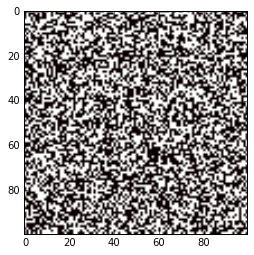

In [3]:
def initialize_grid(n):
    """
    Creates an nxn grid of points randomly assigned to -1 or 1
    """
    grid = np.random.binomial(1, .5, (n,n))
    grid[grid==0] -= 1
    return grid

grid = initialize_grid(100)
plt.imshow(grid, cmap='hot')

In [4]:
def calc_energy(grid):
    """
    Calculate energy of a particular spin configuration
    
    Parameters:
        grid: A square grid of charges; each should take on value -1 or 1
        
    Returns:
        energy:  Calculated energy of the grid"""
    energy = np.sum(grid*np.roll(grid, 1, axis=1)) 
    #energy += np.sum(grid*np.roll(grid, -1, axis=1)) 
    energy += np.sum(grid*np.roll(grid, 1, axis=0))
    #energy += np.sum(grid*np.roll(grid, -1, axis=0))
    
    return energy

In [5]:
def respin(n):
    """
    Calculate an index for which to change the electron "spin"
    """
    return np.random.randint(n, size=(2))

In [6]:
def switched_energy(grid, switch_index, current_energy):
    x, y = switch_index[0], switch_index[1]
    n = grid.shape[0]
    x_1 = x+1
    y_1 = y+1
    if x_1 == n:
        x_1 = 0
    if y_1 == n:
        y_1 = 0
    current_energy += -2*grid[x, y]*(grid[x-1, y] + grid[x_1, y] + grid[x, y-1] + grid[x, y_1])
    return current_energy

In [7]:
def accept_or_reject(current_energy, proposed_energy, beta):
    """
    Determine whether to accept a proposed spin configuration.  
    
    Returns:
    Boolean telling whether a proposed configuration was accepted
    """
    a = min([np.exp(beta*(current_energy - proposed_energy)), 1])
    draw = np.random.uniform()
    if draw < a:
        return True
    else:
        return False

In [8]:
def grid_metropolis(n_samples, grid_size, beta):
    grid = initialize_grid(grid_size)
    burn_in = 10000
    log_prob = []
    accept_counter = 0
    
    for i in xrange(burn_in):
        current_energy = calc_energy(grid)
        index = respin(grid_size)
        new_energy = switched_energy(grid, index, current_energy)
        accept = accept_or_reject(current_energy, new_energy, beta)
        if accept:
            accept_counter += 1
            current_energy = new_energy
            grid[index[0], index[1]]*=-1
    
    for i in xrange(n_samples):
        current_energy = calc_energy(grid)
        index = respin(grid_size)
        new_energy = switched_energy(grid, index, current_energy)
        accept = accept_or_reject(current_energy, new_energy, beta)
        #print current_energy, new_energy
        #print accept, current_energy, new_energy
        if accept:
            accept_counter += 1
            current_energy = new_energy
            grid[index[0], index[1]]*=-1
        if i%1000 == 0:
            #print i
            log_prob.append(-beta*current_energy)
            #plt.plot(-beta*current_energy, i)
    
    accept_rate = accept_counter/n_samples
    
    plt.plot(range(n_samples//1000), log_prob)
    plt.show()
    plt.imshow(grid, cmap='hot')
    
    return log_prob, accept_rate

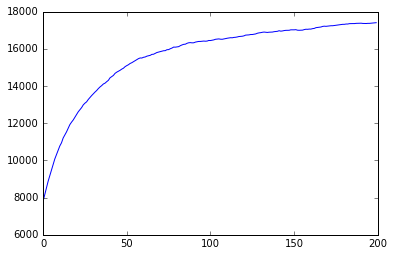

([7800,
  8156,
  8532,
  8872,
  9172,
  9468,
  9780,
  10076,
  10304,
  10532,
  10776,
  10944,
  11204,
  11368,
  11532,
  11732,
  11924,
  12056,
  12172,
  12320,
  12476,
  12612,
  12720,
  12836,
  12984,
  13076,
  13148,
  13276,
  13384,
  13484,
  13580,
  13672,
  13756,
  13860,
  13948,
  14020,
  14108,
  14152,
  14232,
  14304,
  14440,
  14504,
  14568,
  14680,
  14744,
  14796,
  14844,
  14908,
  14956,
  15040,
  15096,
  15144,
  15212,
  15252,
  15308,
  15368,
  15416,
  15472,
  15508,
  15504,
  15544,
  15560,
  15604,
  15624,
  15648,
  15700,
  15708,
  15756,
  15800,
  15824,
  15852,
  15868,
  15896,
  15900,
  15952,
  15956,
  16004,
  16040,
  16092,
  16088,
  16100,
  16116,
  16168,
  16208,
  16240,
  16248,
  16296,
  16324,
  16332,
  16320,
  16324,
  16360,
  16380,
  16396,
  16396,
  16404,
  16416,
  16408,
  16416,
  16448,
  16444,
  16460,
  16480,
  16512,
  16524,
  16532,
  16516,
  16512,
  16528,
  16548,
  16568,
  16580,

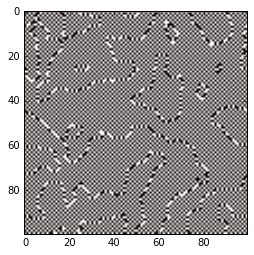

In [9]:
grid_metropolis(200000, 100, 1)

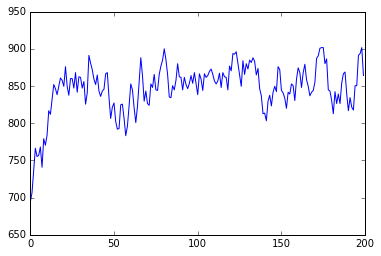

([694.4000000000001,
  706.4000000000001,
  736.0,
  766.4000000000001,
  755.2,
  756.8000000000001,
  768.0,
  740.8000000000001,
  779.2,
  770.4000000000001,
  784.0,
  816.8000000000001,
  812.0,
  832.0,
  852.0,
  846.4000000000001,
  838.4000000000001,
  849.6,
  860.8000000000001,
  857.6,
  849.6,
  876.0,
  849.6,
  837.6,
  860.0,
  860.0,
  847.2,
  868.0,
  841.6,
  862.4000000000001,
  861.6,
  847.2,
  856.0,
  825.6,
  840.8000000000001,
  891.2,
  880.8000000000001,
  872.0,
  859.2,
  852.0,
  864.8000000000001,
  843.2,
  836.0,
  843.2,
  845.6,
  866.4000000000001,
  868.0,
  834.4000000000001,
  806.4000000000001,
  821.6,
  827.2,
  802.4000000000001,
  792.0,
  792.8000000000001,
  824.8000000000001,
  825.6,
  806.4000000000001,
  783.2,
  796.0,
  823.2,
  852.8000000000001,
  844.8000000000001,
  820.8000000000001,
  800.8000000000001,
  822.4000000000001,
  855.2,
  888.0,
  864.0,
  829.6,
  843.2,
  826.4000000000001,
  824.0,
  852.8000000000001,
  848.0

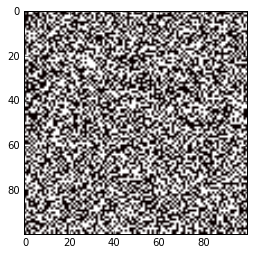

In [10]:
grid_metropolis(200000, 100, .2)